## Putting it all together

In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import janitor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from skopt.space import Real, Integer
import janitor

In [2]:
data = pd.read_csv("data/bankchurnersuse.csv").clean_names()

In [3]:
data

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
train, test = train_test_split(data, random_state = 10, train_size = 0.8, stratify = data["attrition_flag"])

In [5]:
train, test_init = train_test_split(train, random_state = 10, train_size = 0.8, stratify = train["attrition_flag"])

In [6]:
train.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2147,770882508,Existing Customer,38,M,2,College,Married,$80K - $120K,Blue,24,...,1,5,17162.0,773,16389.0,1.238,2457,54,1.000,0.045
7967,712200033,Existing Customer,44,F,4,High School,Single,Less than $40K,Blue,36,...,3,3,3024.0,0,3024.0,0.750,4983,78,0.733,0.000
9892,806917983,Existing Customer,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,3,1,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045
7983,715463133,Existing Customer,40,M,5,High School,Single,$120K +,Blue,31,...,1,3,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041
5638,711824358,Existing Customer,44,F,4,College,Single,Less than $40K,Blue,31,...,3,2,3228.0,0,3228.0,0.747,4524,70,0.667,0.000


In [7]:
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3933,815240358,Existing Customer,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,779284833,Existing Customer,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,719658858,Existing Customer,50,F,4,Doctorate,Married,Unknown,Silver,36,...,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,719459358,Existing Customer,52,M,1,Doctorate,Married,$120K +,Blue,41,...,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,734924658,Existing Customer,47,F,5,High School,Married,Less than $40K,Blue,36,...,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536


### Hardcoded Feature Engineering

In [8]:
train["revolving_trans"] = train["total_revolving_bal"]/train["total_trans_amt"]
test_init["revolving_trans"] = test_init["total_revolving_bal"]/test_init["total_trans_amt"]
test["revolving_trans"] = test["total_revolving_bal"]/test["total_trans_amt"]

In [9]:
train["marriage_education"] = train["marital_status"] + "_" + train["education_level"]
test_init["marriage_education"] = test_init["marital_status"] + "_" + test_init["education_level"]
test["marriage_education"] = test["marital_status"] + "_" + test["education_level"]

In [10]:
train["attrition_flag"] = train["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test["attrition_flag"] = test["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test_init["attrition_flag"] = test_init["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)

### Data deduplication

In [11]:
train_0 = train[train["attrition_flag"] == 0]
train_0.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2147,770882508,0,38,M,2,College,Married,$80K - $120K,Blue,24,...,17162.0,773,16389.0,1.238,2457,54,1.000,0.045,0.314611,Married_College
7967,712200033,0,44,F,4,High School,Single,Less than $40K,Blue,36,...,3024.0,0,3024.0,0.750,4983,78,0.733,0.000,0.000000,Single_High School
9892,806917983,0,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045,0.100395,Divorced_Graduate
7983,715463133,0,40,M,5,High School,Single,$120K +,Blue,31,...,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041,0.385780,Single_High School
5638,711824358,0,44,F,4,College,Single,Less than $40K,Blue,31,...,3228.0,0,3228.0,0.747,4524,70,0.667,0.000,0.000000,Single_College


In [12]:
train_1 = train[train["attrition_flag"] == 1]
train_1.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
5562,787665258,1,47,F,3,Unknown,Married,Less than $40K,Blue,37,...,1438.3,0,1438.3,0.749,2393,36,0.636,0.0,0.0,Married_Unknown
6731,711122958,1,41,F,3,Graduate,Single,Less than $40K,Blue,33,...,1764.0,0,1764.0,0.552,2105,57,0.839,0.0,0.0,Single_Graduate
2174,712551258,1,39,M,1,Uneducated,Married,Less than $40K,Blue,36,...,4247.0,0,4247.0,0.405,847,17,0.133,0.0,0.0,Married_Uneducated
7973,820694133,1,60,F,0,High School,Married,Unknown,Blue,55,...,5549.0,0,5549.0,0.703,2412,38,0.520,0.0,0.0,Married_High School
2284,710586483,1,26,F,0,High School,Single,Unknown,Blue,13,...,6152.0,0,6152.0,0.391,968,23,0.533,0.0,0.0,Single_High School


In [13]:
train_0 = train_0.drop_duplicates()

### Class balancing

In [14]:
rand_list = list(np.random.randint(0, len(train_0), len(train_1)))

In [15]:
train_0 = train_0.iloc[rand_list,]
train_0.shape

(1041, 23)

In [16]:
train_new = pd.concat([train_0, train_1], axis = 0)
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
3632,708225483,0,47,M,4,Graduate,Married,$80K - $120K,Blue,36,...,11242.0,1561,9681.0,0.829,4246,81,0.800,0.139,0.367640,Married_Graduate
8639,718665933,0,43,M,3,Unknown,Divorced,$120K +,Blue,30,...,34516.0,2517,31999.0,0.770,7437,86,0.623,0.073,0.338443,Divorced_Unknown
8466,714216858,0,35,F,2,Unknown,Single,Unknown,Blue,36,...,1507.0,0,1507.0,0.810,4679,85,0.771,0.000,0.000000,Single_Unknown
2984,778170633,0,48,M,5,Graduate,Married,$80K - $120K,Blue,38,...,34516.0,657,33859.0,0.723,3661,71,0.868,0.019,0.179459,Married_Graduate
5242,719268333,0,49,F,3,Uneducated,Married,Less than $40K,Blue,36,...,1438.3,0,1438.3,0.929,4205,88,0.660,0.000,0.000000,Married_Uneducated


### Splitting into independent and dependent variables

In [17]:
x_train, y_train = train_new.drop(['attrition_flag','gender','clientnum','marital_status','education_level'], axis = 1), train_new["attrition_flag"]

In [18]:
x_test, y_test = test.drop(['attrition_flag','gender','clientnum', 'marital_status', 'education_level'], axis = 1), test["attrition_flag"]

In [19]:
x_test_init, y_test_init = test_init.drop(['attrition_flag','gender','clientnum', 'marital_status', 'education_level'], axis = 1), test_init["attrition_flag"]

### Gathering categorical and numerical columns

In [20]:
num = []
cat = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        cat.append(col)

In [21]:
num

['customer_age',
 'dependent_count',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'credit_limit',
 'total_revolving_bal',
 'avg_open_to_buy',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'revolving_trans']

### Preprocessing tools

In [22]:
one_hot = OneHotEncoder()
min_max = MinMaxScaler()
sd = StandardScaler()
le = LabelEncoder()

In [23]:
ct = ColumnTransformer([("one_hot", one_hot, cat), ("min_max", min_max, num)])

### Pipeline Creation

In [24]:
pipeline = Pipeline([("ct", ct), ("xgb", XGBClassifier())])

### Bayesian Search

In [25]:
import numpy as np

In [26]:
list(np.linspace(10,100,10))

[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]

In [27]:
np.arange(10,100,10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [28]:
np.linspace(0,1,50)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [29]:
parameters = {
    "xgb__n_estimators": list(np.arange(10,110,10)),
    "xgb__subsample": list(np.linspace(0,1,50)),
    "xgb__learning_rate": list(np.linspace(0.01,1,100)),
    "xgb__gamma": list(np.linspace(0.01,10,100)),
    "xgb__colsample_bytree": list(np.linspace(0.5,1,100)),
    "xgb__reg_alpha": list(np.linspace(0,0.5,50)),
    'xgb__max_depth': list(np.arange(8,21))
}

In [30]:
bayes_search = BayesSearchCV(pipeline, parameters, cv = 5, n_iter = 30)

In [31]:
bayes_search.fit(x_train, y_train)

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.round(X).astype(np.int) - self.low) /\
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:262: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.round(X_orig).astype(np.int)
/home/ganiyuma/.local/lib/python3.9/site-packages/skopt/space/transformers.py:275: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('ct',
                                         ColumnTransformer(transformers=[('one_hot',
                                                                          OneHotEncoder(),
                                                                          ['income_category',
                                                                           'card_category',
                                                                           'marriage_education']),
                                                                         ('min_max',
                                                                          MinMaxScaler(),
                                                                          ['customer_age',
                                                                           'dependent_count',
                                                                           'months_on_book',
                   

In [32]:
bayes_search.best_params_

OrderedDict([('xgb__colsample_bytree', 0.9090909090909092),
             ('xgb__gamma', 0.6154545454545455),
             ('xgb__learning_rate', 0.18000000000000002),
             ('xgb__max_depth', 18),
             ('xgb__n_estimators', 50),
             ('xgb__reg_alpha', 0.42857142857142855),
             ('xgb__subsample', 0.836734693877551)])

In [33]:
bayes_search.best_score_

0.9476480354178196

In [34]:
model = bayes_search.best_estimator_

### Cross Validation via pipeline

In [35]:
cross_val_score(model, x_train, y_train, cv = 5, scoring = "precision")

array([0.95073892, 0.93953488, 0.95652174, 0.93023256, 0.93867925])

### Fitting pipeline on training data

In [36]:
model.fit(x_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['income_category',
                                                   'card_category',
                                                   'marriage_education']),
                                                 ('min_max', MinMaxScaler(),
                                                  ['customer_age',
                                                   'dependent_count',
                                                   'months_on_book',
                                                   'total_relationship_count',
                                                   'months_inactive_12_mon',
                                                   'contacts_count_12_mon',
                                                   'credit_limit',
                                                   'total_revolving_bal',
                              

### Evaluating pipeline's accuracy

#### Training data results

In [37]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00      1041

    accuracy                           1.00      2082
   macro avg       1.00      1.00      1.00      2082
weighted avg       1.00      1.00      1.00      2082



<AxesSubplot:>

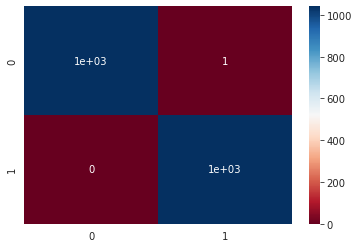

In [38]:
conf = confusion_matrix(y_train, pred_train)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [39]:
train_new["prediction"] = pred_train
train_probs = model.predict_proba(x_train)
train_new["prob_0"], train_new["prob_1"] = train_probs[:,0], train_probs[:,1]
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
3632,708225483,0,47,M,4,Graduate,Married,$80K - $120K,Blue,36,...,0.829,4246,81,0.800,0.139,0.367640,Married_Graduate,0,0.998541,0.001459
8639,718665933,0,43,M,3,Unknown,Divorced,$120K +,Blue,30,...,0.770,7437,86,0.623,0.073,0.338443,Divorced_Unknown,0,0.934449,0.065551
8466,714216858,0,35,F,2,Unknown,Single,Unknown,Blue,36,...,0.810,4679,85,0.771,0.000,0.000000,Single_Unknown,0,0.997227,0.002773
2984,778170633,0,48,M,5,Graduate,Married,$80K - $120K,Blue,38,...,0.723,3661,71,0.868,0.019,0.179459,Married_Graduate,0,0.997837,0.002163
5242,719268333,0,49,F,3,Uneducated,Married,Less than $40K,Blue,36,...,0.929,4205,88,0.660,0.000,0.000000,Married_Uneducated,0,0.993137,0.006863


#### Initial test data results

In [40]:
pred_test_init = model.predict(x_test_init)
print(classification_report(y_test_init, pred_test_init))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1360
           1       0.76      0.93      0.84       261

    accuracy                           0.94      1621
   macro avg       0.87      0.94      0.90      1621
weighted avg       0.95      0.94      0.94      1621



<AxesSubplot:>

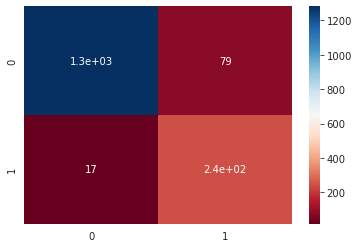

In [41]:
conf = confusion_matrix(y_test_init, pred_test_init)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [42]:
test_init["prediction"] = pred_test_init
test_init_probs = model.predict_proba(x_test_init)
test_init["prob_0"], test_init["prob_1"] = test_init_probs[:,0], test_init_probs[:,1]
test_init.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
2447,712040433,0,54,F,1,High School,Married,Less than $40K,Blue,43,...,0.697,2097,57,0.541,0.954,1.049118,Married_High School,0,0.649768,0.350232
2052,765824058,0,46,M,4,Doctorate,Married,$80K - $120K,Blue,39,...,0.907,3784,74,0.609,0.301,0.406712,Married_Doctorate,0,0.996879,0.003121
7923,718548558,0,53,F,3,Unknown,Single,Less than $40K,Blue,42,...,0.927,4272,70,0.750,0.700,0.477762,Single_Unknown,0,0.995882,0.004118
2293,710567508,0,53,M,3,High School,Married,$80K - $120K,Blue,44,...,0.571,1387,33,0.650,0.094,1.587599,Married_High School,0,0.975039,0.024961
4750,715776033,0,46,M,5,Uneducated,Single,$60K - $80K,Blue,33,...,0.572,4116,68,0.700,0.000,0.000000,Single_Uneducated,0,0.993988,0.006012


In [43]:
pred_init_score = test_init["prob_1"]

#### Precision - Recall Curve

In [44]:
precisions, recalls, thresholds = precision_recall_curve(y_test_init, pred_init_score)

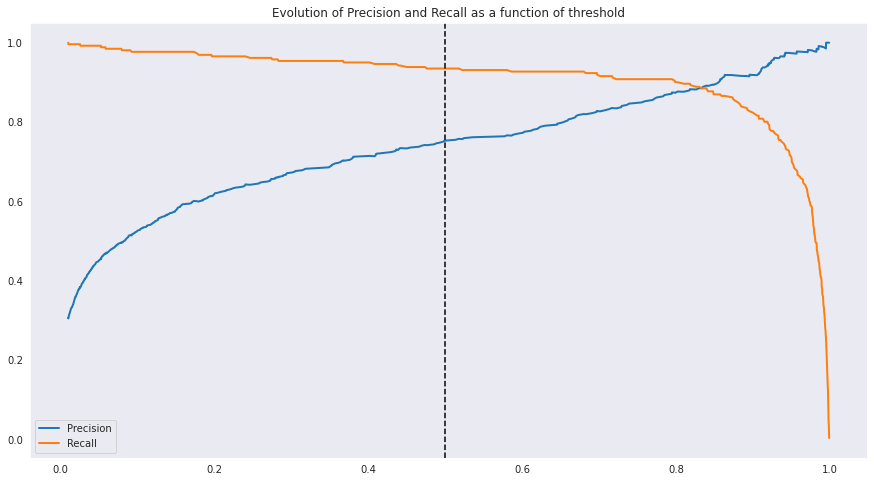

In [45]:
plt.figure(figsize = (15,8))
sns.lineplot(x = thresholds, y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
sns.lineplot(x = thresholds, y = recalls[:-1], markers = "g-", label="Recall", linewidth=2)
plt.axvline(x = [0.5], color = "black", linestyle = "dashed")
plt.title("Evolution of Precision and Recall as a function of threshold")
plt.show()

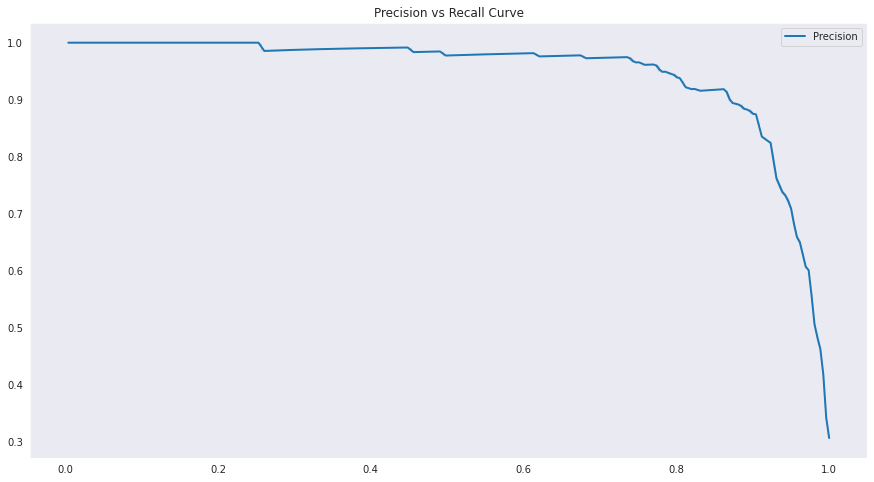

In [46]:
plt.figure(figsize = (15,8))
sns.lineplot(x = recalls[:-1], y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
plt.title("Precision vs Recall Curve")
#plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
# beautify the figure: add grid, legend, axis, labels, and circles
plt.show();

#### ROC Curve/ROC AUC Score

In [47]:
roc_auc_score(y_test_init, pred_init_score)

0.9859674329501915

In [48]:
fpr, tpr, thresholds = roc_curve(y_test_init, pred_init_score)

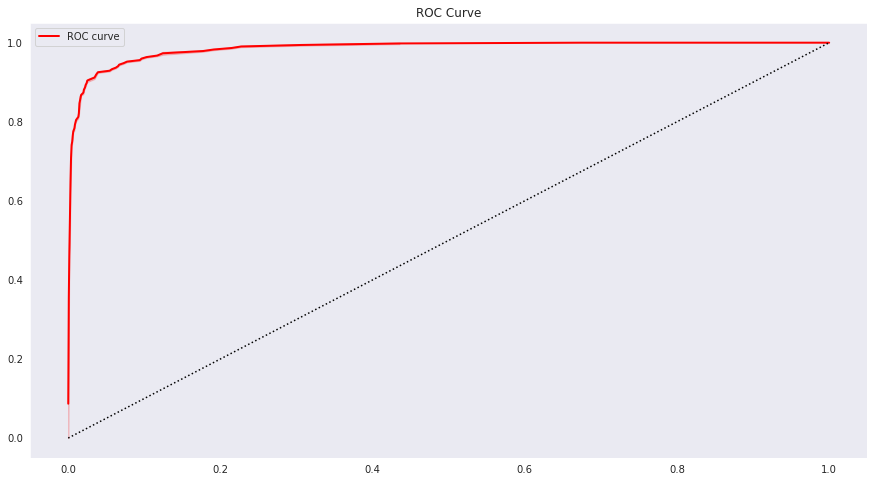

In [49]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()

#### Feature Importance

In [50]:
vip = model.steps[1][1].feature_importances_
vip

array([0.0173102 , 0.01898525, 0.01872124, 0.00565524, 0.01569135,
       0.        , 0.00649976, 0.01060878, 0.        , 0.02524141,
       0.        , 0.        , 0.01294908, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02270868,
       0.00912931, 0.00592499, 0.        , 0.        , 0.        ,
       0.        , 0.00913026, 0.02061277, 0.00788762, 0.00751032,
       0.01030552, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03183394, 0.01089964,
       0.01934052, 0.06515351, 0.01941294, 0.03245752, 0.01753742,
       0.04704132, 0.027982  , 0.03085938, 0.06680389, 0.22965343,
       0.04902514, 0.02277964, 0.10434794], dtype=float32)

In [51]:
model.steps[0][1].transformers_[0][1].get_feature_names()

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_$120K +', 'x0_$40K - $60K', 'x0_$60K - $80K',
       'x0_$80K - $120K', 'x0_Less than $40K', 'x0_Unknown', 'x1_Blue',
       'x1_Gold', 'x1_Platinum', 'x1_Silver', 'x2_Divorced_College',
       'x2_Divorced_Doctorate', 'x2_Divorced_Graduate',
       'x2_Divorced_High School', 'x2_Divorced_Post-Graduate',
       'x2_Divorced_Uneducated', 'x2_Divorced_Unknown',
       'x2_Married_College', 'x2_Married_Doctorate',
       'x2_Married_Graduate', 'x2_Married_High School',
       'x2_Married_Post-Graduate', 'x2_Married_Uneducated',
       'x2_Married_Unknown', 'x2_Single_College', 'x2_Single_Doctorate',
       'x2_Single_Graduate', 'x2_Single_High School',
       'x2_Single_Post-Graduate', 'x2_Single_Uneducated',
       'x2_Single_Unknown', 'x2_Unknown_College', 'x2_Unknown_Doctorate',
       'x2_Unknown_Graduate', 'x2_Unknown_High School',
       'x2_Unknown_Post-Graduate', 'x2_Unknown_Uneducated',
       'x2_Unknown_Unknown'], dtype=object)

In [52]:
#create df with vip info
feature_importances_info = pd.DataFrame({'feat_names':list(model.steps[0][1].transformers_[0][1].get_feature_names()) + num, 'vip': vip})

#get sign and magnitude information
feature_importances_info = feature_importances_info.assign(feature_importances_mag = abs(feature_importances_info['vip']),
                             feature_importances_sign = np.sign(feature_importances_info['vip']))
feature_importances_info = feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
feature_importances_info.head(10)

,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
total_trans_ct,0.229653,0.229653,1.0
revolving_trans,0.104348,0.104348,1.0
total_trans_amt,0.066804,0.066804,1.0
total_relationship_count,0.065154,0.065154,1.0
total_ct_chng_q4_q1,0.049025,0.049025,1.0
total_revolving_bal,0.047041,0.047041,1.0
contacts_count_12_mon,0.032458,0.032458,1.0
customer_age,0.031834,0.031834,1.0
total_amt_chng_q4_q1,0.030859,0.030859,1.0


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


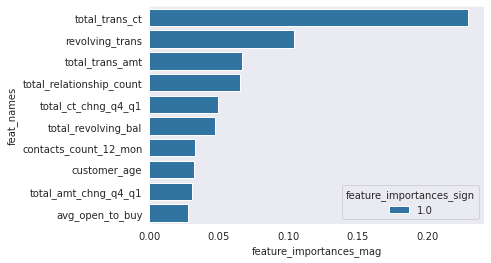

In [53]:
sns.barplot(y=feature_importances_info.index[:10], x='feature_importances_mag', hue='feature_importances_sign', 
            data=feature_importances_info[:10], orient='h', dodge=False);

In [54]:
len(feature_importances_info[feature_importances_info["vip"] > 0.015])

21

In [55]:
feature_importances_info[feature_importances_info["vip"] > 0.015].index

Index(['total_trans_ct', 'revolving_trans', 'total_trans_amt',
       'total_relationship_count', 'total_ct_chng_q4_q1',
       'total_revolving_bal', 'contacts_count_12_mon', 'customer_age',
       'total_amt_chng_q4_q1', 'avg_open_to_buy', 'x1_Silver',
       'avg_utilization_ratio', 'x2_Married_Graduate', 'x2_Single_High School',
       'months_inactive_12_mon', 'months_on_book', 'x0_$40K - $60K',
       'x0_$60K - $80K', 'credit_limit', 'x0_$120K +', 'x0_Less than $40K'],
      dtype='object', name='feat_names')

#### Holdout test data results

In [56]:
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1701
           1       0.72      0.98      0.83       325

    accuracy                           0.94      2026
   macro avg       0.86      0.95      0.90      2026
weighted avg       0.95      0.94      0.94      2026



<AxesSubplot:>

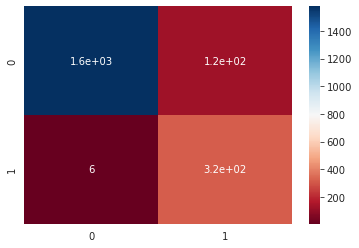

In [57]:
conf = confusion_matrix(y_test, pred_test)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [58]:
test["prediction"] = pred_test
test_probs = model.predict_proba(x_test)
test["prob_0"], test["prob_1"] = test_probs[:,0], test_probs[:,1]
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
3933,815240358,0,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1.063,3357,62,0.771,0.060,0.447125,Married_Uneducated,0,0.994296,0.005704
2790,779284833,0,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,0.758,3591,63,0.750,0.081,0.500975,Single_Post-Graduate,0,0.997144,0.002856
8663,719658858,0,50,F,4,Doctorate,Married,Unknown,Silver,36,...,0.666,7042,73,0.553,0.061,0.297643,Married_Doctorate,0,0.777417,0.222583
731,719459358,0,52,M,1,Doctorate,Married,$120K +,Blue,41,...,1.219,1751,48,0.920,0.029,0.564820,Married_Doctorate,0,0.989336,0.010664
3335,734924658,0,47,F,5,High School,Married,Less than $40K,Blue,36,...,0.873,4123,67,0.489,0.536,0.192093,Married_High School,0,0.959227,0.040773


In [59]:
pred_score = test["prob_1"]

#### Precision - Recall Curve

In [60]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_score)

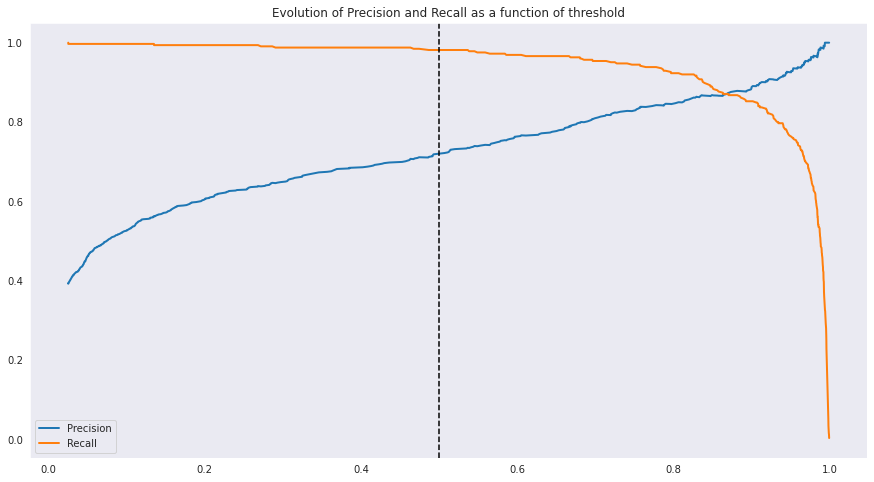

In [61]:
plt.figure(figsize = (15,8))
sns.lineplot(x = thresholds, y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
sns.lineplot(x = thresholds, y = recalls[:-1], markers = "g-", label="Recall", linewidth=2)
plt.axvline(x = [0.5], color = "black", linestyle = "dashed")
plt.title("Evolution of Precision and Recall as a function of threshold")
plt.show()

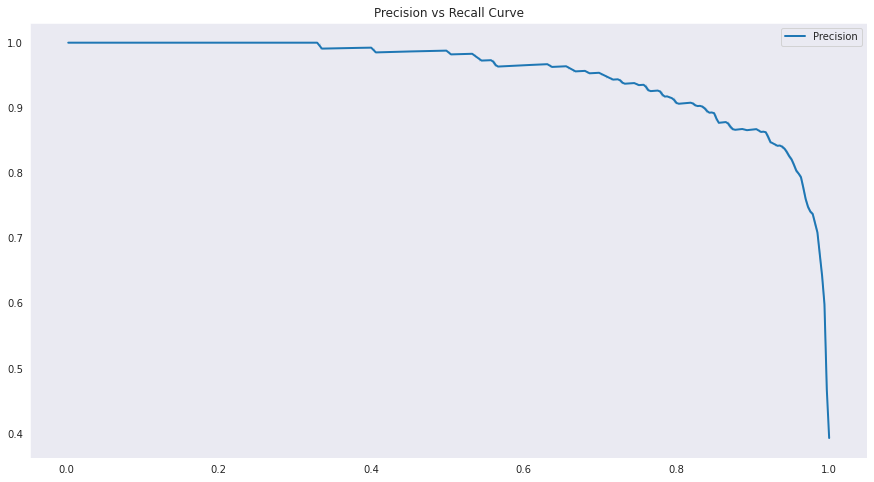

In [62]:
plt.figure(figsize = (15,8))
sns.lineplot(x = recalls[:-1], y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
plt.title("Precision vs Recall Curve")
#plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
# beautify the figure: add grid, legend, axis, labels, and circles
plt.show();

#### ROC Curve/ROC AUC Score

In [63]:
roc_auc_score(y_test, pred_score)

0.9901668701668701

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, pred_score)

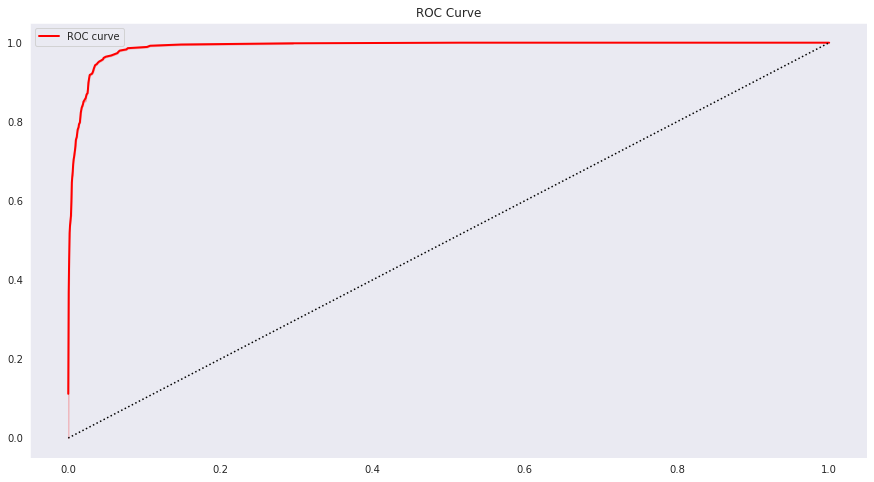

In [65]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()